In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline #chart show

UsageError: unrecognized arguments: #chart show


In [2]:
df=pd.read_csv("1.1-k means clustering Algorithm DataSet/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### title name change

In [3]:
df.rename(columns={'Gender':'gender','Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'},inplace=True)
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID    0
gender        0
age           0
income        0
score         0
dtype: int64

In [6]:
df.isnull().values.any()

False

In [7]:
df.describe() 

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


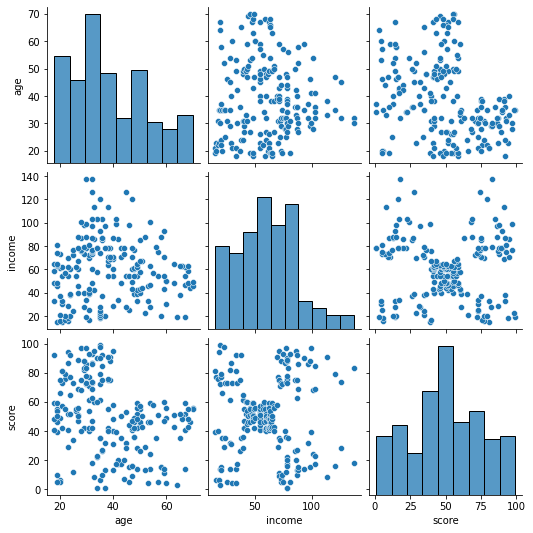

In [8]:
sns.pairplot(df[['age','income','score']])

In [9]:
from sklearn.cluster import KMeans 

In [10]:
kmeans=KMeans(n_clusters=5)

#### score and income

In [11]:
kmeans=kmeans.fit(df[['score','income']])

In [12]:
kmeans.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783],
       [79.36363636, 25.72727273]])

In [13]:
df['income_cluster']=kmeans.labels_
df

,CustomerID,gender,age,income,score,income_cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [14]:
df['income_cluster'].value_counts()

0    81
1    39
2    35
3    23
4    22
Name: income_cluster, dtype: int64

<AxesSubplot:xlabel='income', ylabel='score'>

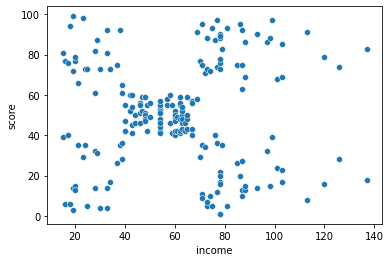

In [15]:
sns.scatterplot(x='income',y='score',data=df)

<AxesSubplot:xlabel='income', ylabel='score'>

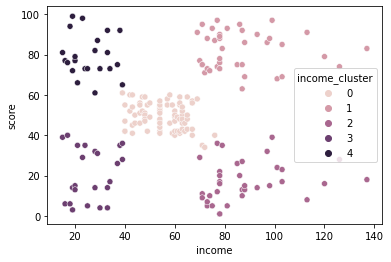

In [16]:
sns.scatterplot(x='income',y='score',hue='income_cluster',data=df)

#### age and score

In [17]:
kmeans=KMeans(n_clusters=2)

In [18]:
kmeans=kmeans.fit(df[['age','score']])

In [19]:
kmeans.cluster_centers_

array([[28.95294118, 73.62352941],
       [46.16521739, 32.88695652]])

In [20]:
df['age_cluster']=kmeans.labels_
df

,CustomerID,gender,age,income,score,income_cluster,age_cluster
0,1,Male,19,15,39,3,1
1,2,Male,21,15,81,4,0
2,3,Female,20,16,6,3,1
3,4,Female,23,16,77,4,0
4,5,Female,31,17,40,3,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0
196,197,Female,45,126,28,2,1
197,198,Male,32,126,74,1,0
198,199,Male,32,137,18,2,1


In [21]:
df['age_cluster'].value_counts()

1    115
0     85
Name: age_cluster, dtype: int64

<AxesSubplot:xlabel='age', ylabel='score'>

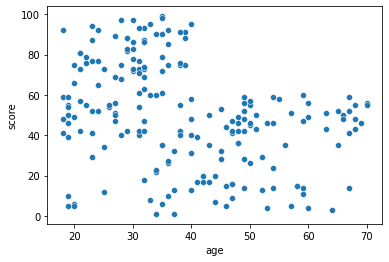

In [22]:
sns.scatterplot(x='age',y='score',data=df)

<AxesSubplot:xlabel='age', ylabel='score'>

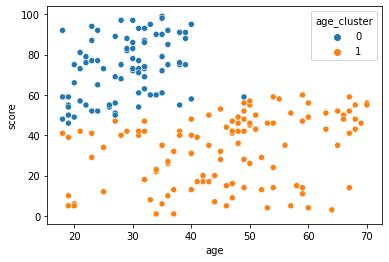

In [23]:
sns.scatterplot(x='age',y='score',hue='age_cluster',data=df)

####  age and income

In [24]:
kmeans=KMeans(n_clusters=2)

In [25]:
kmeans=kmeans.fit(df[['age','income']])

In [26]:
kmeans.cluster_centers_

array([[42.21904762, 40.78095238],
       [35.12631579, 82.42105263]])

In [27]:
df['age_cluster']=kmeans.labels_
df

,CustomerID,gender,age,income,score,income_cluster,age_cluster
0,1,Male,19,15,39,3,0
1,2,Male,21,15,81,4,0
2,3,Female,20,16,6,3,0
3,4,Female,23,16,77,4,0
4,5,Female,31,17,40,3,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,1
196,197,Female,45,126,28,2,1
197,198,Male,32,126,74,1,1
198,199,Male,32,137,18,2,1


In [28]:
df['age_cluster'].value_counts()

0    105
1     95
Name: age_cluster, dtype: int64

<AxesSubplot:xlabel='income', ylabel='age'>

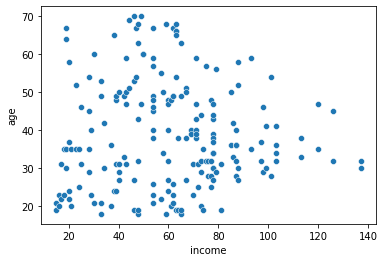

In [29]:
sns.scatterplot(x='income',y='age',data=df)

<AxesSubplot:xlabel='income', ylabel='age'>

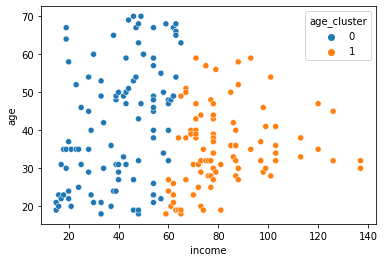

In [30]:
sns.scatterplot(x='income',y='age',hue='age_cluster',data=df)

### Elbow Method in K-Means Clustering = income and score

In [31]:
from sklearn.cluster import KMeans

In [32]:
k_range=range(1,12)
wcss=[]

In [33]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['income','score']])
    wcss.append(km.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30241.34361793659,
 25022.485004530332,
 21826.936303231643,
 19712.851860217084,
 17602.190468386776]

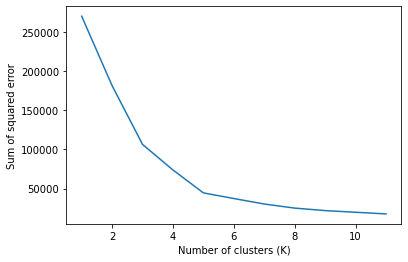

In [35]:
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(k_range,wcss)

### Elbow Method in K-Means Clustering = age and score

In [36]:
from sklearn.cluster import KMeans

In [37]:
k_range=range(1,12)
wcss=[]

In [38]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['age','score']])
    wcss.append(km.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [39]:
wcss

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23810.462233071372,
 19628.819863023316,
 15514.193134351033,
 13046.228436764528,
 11505.867184343435,
 10207.6429337547,
 9467.056403701394]

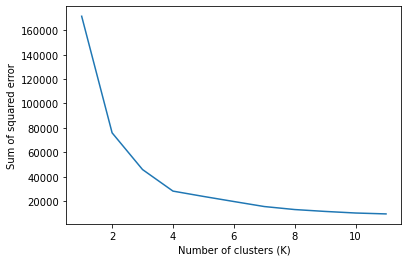

In [40]:
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(k_range,wcss)